In [488]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.patches import Circle, Rectangle, Polygon


nx, ny = 30, 30

def draw(B, artists):
    # Grid of x, y points
    x = np.linspace(-2, 2, nx)
    y = np.linspace(-2, 2, ny)
    X, Y = np.meshgrid(x, y)

    # Electric field vector, E=(Ex, Ey), as separate components
    b = B(X, Y)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    blen = np.max(np.abs(b))

    s = ax.scatter(X.ravel(), Y.ravel(), s=2, c=b, cmap=plt.cm.seismic, norm=colors.Normalize(-blen, blen)) # gist_ncar

    for artist in artists:
        ax.add_artist(artist)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')

    fig.colorbar(s, ax=ax)

    plt.show()

def getB(theta, r0, x, y):
    dx = x - r0[0]
    dy = y - r0[1]
    r = np.hypot(dx, dy)
    return -(np.sin(theta)*dx - np.cos(theta)*dy) / r / r

charge_colors = {True: '#aa0000', False: '#0000aa'}

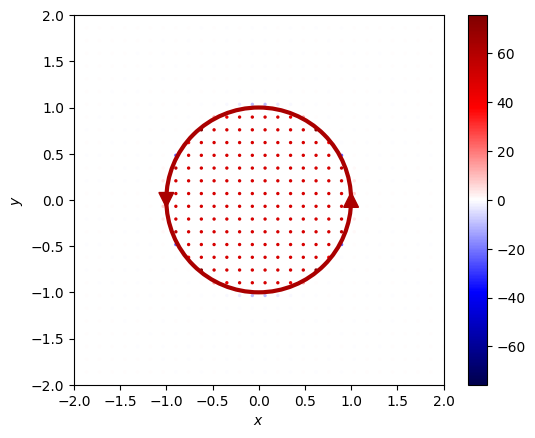

In [489]:
NP = 50
def B1(x, y):
    b1 = np.zeros((ny, nx))
    for i in range(NP):
        theta = 2*np.pi*i/NP
        r0 = (np.cos(theta), np.sin(theta))
        b1 += getB(theta+np.pi/2, r0, x, y)
    return b1

RDX = 0.08
RDY = 0.16

artists = [
    Circle((0, 0), 1, fill=False, lw=3, color=charge_colors[True]),
    Polygon(((1,RDY/2), (1-RDX, -RDY/2), (1+RDX, -RDY/2)), closed=True, fill=True, color=charge_colors[True]),
    Polygon(((-1,-RDY/2), (-1-RDX, +RDY/2), (-1+RDX, +RDY/2)), closed=True, fill=True, color=charge_colors[True]),
]

draw(B1, artists)

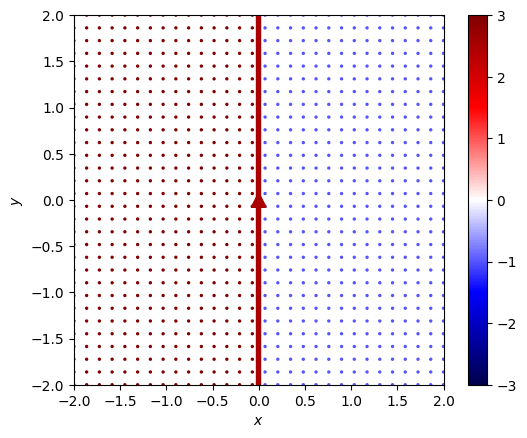

In [490]:
def B2(x, y):
    return (x - np.abs(x)) / x * 2 - 1

artists = [
    Rectangle((-0.03, -3), 0.04, 6, color=charge_colors[True]),
    Polygon(((0,RDY/2), (-RDX, -RDY/2), (+RDX, -RDY/2)), closed=True, fill=True, color=charge_colors[True]),
]

draw(B2, artists)

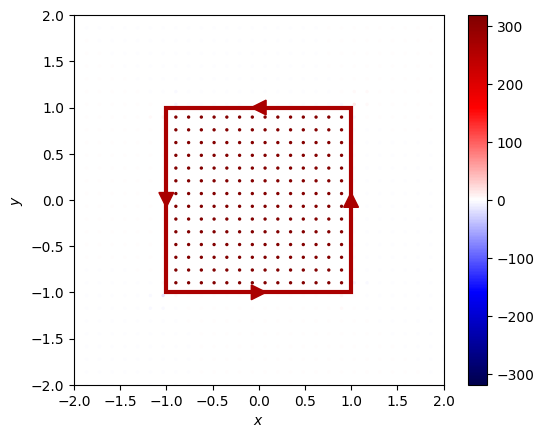

In [491]:
NP = 100
KK = 1

def B3(x, y):
    b = np.zeros((ny, nx))
    for i in range(NP):
        r0 = ((-1+2*i/NP)*(KK), -1)
        b += (getB(0, r0, x, y))
    for i in range(NP):
        r0 = ((-1+2*i/NP)*(KK), 1)
        b += (getB(np.pi, r0, x, y))
    for i in range(NP):
        r0 = (-1, (-1+2*i/NP)*(KK))
        b += (getB(np.pi*3/2, r0, x, y))
    for i in range(NP):
        r0 = (1, (-1+2*i/NP)*(KK))
        b += (getB(np.pi*1/2, r0, x, y))
    return b

artists = [
    Rectangle((-1, -1), 2, 2, fill=False, lw=3, color=charge_colors[True]),
    Polygon(((1, RDY/2), (1-RDX, -RDY/2), (1+RDX, -RDY/2)),
            closed=True, fill=True, color=charge_colors[True]),
    Polygon(((-1, -RDY/2), (-1-RDX, +RDY/2), (-1+RDX, +RDY/2)),
            closed=True, fill=True, color=charge_colors[True]),
    Polygon(((-RDY/2, 1), (RDY/2, 1-RDX), (RDY/2, 1+RDX)),
            closed=True, fill=True, color=charge_colors[True]),
    Polygon(((RDY/2, -1), (-RDY/2, -1-RDX), (-RDY/2, -1+RDX)),
            closed=True, fill=True, color=charge_colors[True]),
]

draw(B3, artists)

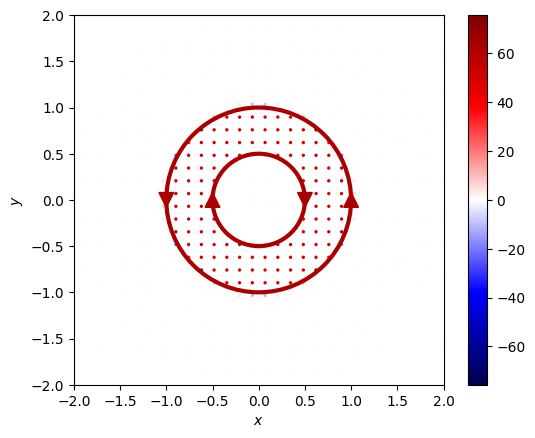

In [492]:
NP = 50

def transformB(b):
    T = 8
    b2 = np.exp(-T*(b-1))
    return (1-b2)/(1+b2)

def B4(x, y):
    b1 = np.zeros((ny, nx))
    for i in range(NP):
        theta = 2*np.pi*i/NP
        r0 = (np.cos(theta), np.sin(theta))
        b1 += getB(theta+np.pi/2, r0, x, y)
    for i in range(NP):
        theta = 2*np.pi*i/NP
        r0 = (0.5*np.cos(theta), 0.5*np.sin(theta))
        b1 += 0.5*getB(theta-np.pi/2, r0, x, y)
    return b1

RDX = 0.08
RDY = 0.16

artists = [
    Circle((0, 0), 1, fill=False, lw=3, color=charge_colors[True]),
    Polygon(((1,RDY/2), (1-RDX, -RDY/2), (1+RDX, -RDY/2)), closed=True, fill=True, color=charge_colors[True]),
    Polygon(((-1,-RDY/2), (-1-RDX, +RDY/2), (-1+RDX, +RDY/2)), closed=True, fill=True, color=charge_colors[True]),
    Circle((0, 0), 0.5, fill=False, lw=3, color=charge_colors[True]),
    Polygon(((0.5,(-RDY)/2), (0.5-RDX, -(-RDY)/2), (0.5+RDX, -(-RDY)/2)), closed=True, fill=True, color=charge_colors[True]),
    Polygon(((-0.5,-(-RDY)/2), (-0.5-RDX, +(-RDY)/2), (-0.5+RDX, +(-RDY)/2)), closed=True, fill=True, color=charge_colors[True]),
]

draw(B4, artists)

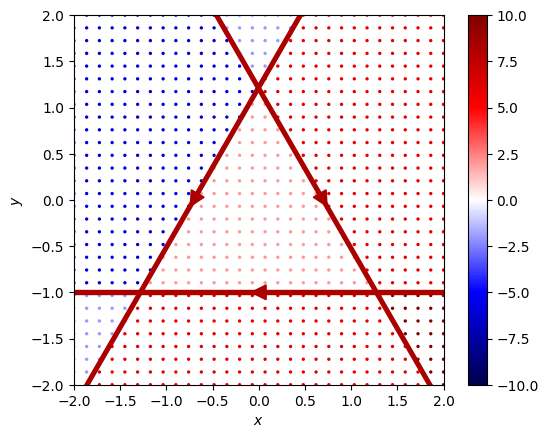

In [493]:
def B3(rad, x0, y0, x, y):
    t = (x0*np.tan(rad) - y0) - (x*np.tan(rad) - y)
    return (t - np.abs(t)) / t * 2 - 1


def B4(x, y):
    return 2 * B3(np.pi/3, -0.7, 0, x, y) + B3(0, 0, -1, x, y) - B3(np.pi*2/3, 0.7, 0, x, y)


www = np.sin(np.pi/3)

artists = [
    Rectangle((-3, -1.02), 6, 0.04, color=charge_colors[True]),
    Rectangle((-4, -0), 6, 0.04, angle=60,
              rotation_point=(-0.68, 0), color=charge_colors[True]),
    Rectangle((-2, -0), 6, 0.04, angle=120,
              rotation_point=(0.72, 0), color=charge_colors[True]),
    Polygon(((-0.7-RDY/4, -RDY/2*www), (-0.7+RDY/4+RDX*www, RDY/2*www-RDX/2), (-0.7+RDY/4-RDX *
            www, RDY/2*www+RDX/2)), closed=True, fill=True, color=charge_colors[True]),
    Polygon(((0.7+RDY/4, -RDY/2*www), (0.7-RDY/4-RDX*www, RDY/2*www-RDX/2), (0.7-RDY/4+RDX *
            www, RDY/2*www+RDX/2)), closed=True, fill=True, color=charge_colors[True]),
    Polygon(((-RDY/2, -1), (RDY/2, -1-RDX), (RDY/2, -1+RDX)),
            closed=True, fill=True, color=charge_colors[True]),
]

draw(B4, artists)

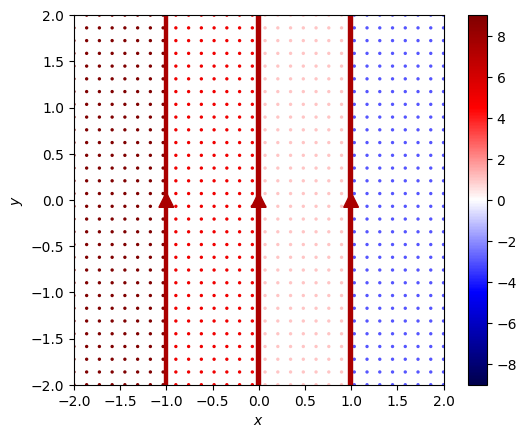

In [494]:
def B4(x0, x, y):
    x1 = x - x0
    return (x1 - np.abs(x1)) / x1 * 2 - 1

def B5(x, y):
    return B4(-1, x, y) + B4(0, x, y) + B4(1, x, y)

artists = [
    Rectangle((-1-0.03, -3), 0.04, 6, color=charge_colors[True]),
    Rectangle((0-0.03, -3), 0.04, 6, color=charge_colors[True]),
    Rectangle((1-0.03, -3), 0.04, 6, color=charge_colors[True]),
    Polygon(((0,RDY/2), (-RDX, -RDY/2), (+RDX, -RDY/2)), closed=True, fill=True, color=charge_colors[True]),
    Polygon(((-1+0,RDY/2), (-1-RDX, -RDY/2), (-1+RDX, -RDY/2)), closed=True, fill=True, color=charge_colors[True]),
    Polygon(((1+0,RDY/2), (1-RDX, -RDY/2), (1+RDX, -RDY/2)), closed=True, fill=True, color=charge_colors[True]),
]

draw(B5, artists)